# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

#### Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 500)

#### Посмотрим на файл

In [4]:
#data = pd.read_csv('/Users/vladimirogulo/PycharmProjects/Praktikum2/real_estate_data.csv',sep ='\\t')
data = pd.read_csv('/datasets/real_estate_data.csv')
data.info()
display(data.head())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

/var/folders/ll/by8df37d7tj6zp9ygfsjbdt00000gn/T/ipykernel_32888/1359515851.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('/Users/vladimirogulo/PycharmProjects/Praktikum2/real_estate_data.csv',sep ='\\t')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Укажем описание данных для удобства 

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах(м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

### Вывод

#### Читаем CSV файл по указанному пути и просмативаем сводную информацию, и разделяем методом sep.
Имеются пропущенные значения в следующих столбцах:
ceiling_height,floors_total, living_area, is_apartment, kitchen_area,balcony, locality_name,airports_nearest,cityCenters_nearest,parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition

Имеются аномальные значения в столбце days_exposition(макимальное значение размещения объявления в днях 1580). Также, мы видим, что в данных большой разброс значений, стандартное отклонение больше среднего, а медиана и среднее далеки друг от друга.

### Шаг 2. Предобработка данных

In [3]:
# Приводим значения к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()
print(data['locality_name'].value_counts())
# Замена 'ё' на 'е'
data['locality_name'] = data['locality_name'].str.replace('ё','е')
display(data.head(10))
# Пропуски в столбце balcony заполним 0ю Предположим, что пользователь имел в виду, что былкона нет, поэтому сделал пропуск
data['balcony'] = data['balcony'].fillna(0)
# Не заполнял графу аппартаменты, так как предполагал, что нужно пропустить поле.
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['locality_name'].value_counts())
#display(data.head())




санкт-петербург       15721
посёлок мурино          522
посёлок шушары          440
всеволожск              398
пушкин                  369
                      ...  
поселок коробицыно        1
деревня хапо-ое           1
посёлок шугозеро          1
поселок перово            1
деревня раздолье          1
Name: locality_name, Length: 364, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


санкт-петербург           15721
поселок мурино              556
поселок шушары              440
всеволожск                  398
пушкин                      369
                          ...  
поселок севастьяново          1
поселок гончарово             1
село шум                      1
поселок красносельское        1
поселок каложицы              1
Name: locality_name, Length: 330, dtype: int64


#### Рассмотрим пропуски в столбцахparks_around3000 и parks_nearest

In [4]:
# Узнаем, симметричные ли пропуски в столбцах
print(data[(pd.isnull(data.parks_around3000)) & (~pd.isnull(data.parks_nearest))].head())
# Видим, что там где пропущены значения в столбце parks_around3000, пропущены значения в parks_nearest
#data.loc[data['parks_around3000'].isna()== True,'parks_nearest'] = data.loc[data['parks_around3000'].isna() == True,'parks_nearest'].fillna(0)
display(data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'].isna()== True),'parks_nearest'])
data['parks_around3000']= data['parks_around3000'].fillna(0)
# пропуски для столбца parks_nearest заменять не будем
# data.loc[((data['parks_around3000'] == 0) & (data['parks_nearest'].isna()== True)),'parks_nearest'] = data.loc[((data['parks_around3000'] == 0) & (data['parks_nearest'].isna()== True)),'parks_nearest'].fillna(0)
data.info()


Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []


1       NaN
6       NaN
7       NaN
9       NaN
11      NaN
         ..
23684   NaN
23685   NaN
23687   NaN
23688   NaN
23691   NaN
Name: parks_nearest, Length: 10102, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Рассмотрим пропуски в столбцах ponds_around3000 и ponds_nearest

In [5]:
# Узнаем, симметричные ли пропуски в столбцах
print(data[(pd.isnull(data.ponds_around3000)) & (~pd.isnull(data.ponds_nearest))].head())
# Видим, что там где пропущены значения в столбце parks_around3000, пропущены значения в parks_nearest
#data.loc[data['parks_around3000'].isna()== True,'parks_nearest'] = data.loc[data['parks_around3000'].isna() == True,'parks_nearest'].fillna(0)
display(data.loc[(data['ponds_around3000'] == 0) & (data['ponds_nearest'].isna()== True),'ponds_nearest'])
data['ponds_around3000']= data['ponds_around3000'].fillna(0)
# пропуски для столбца ponds_nearest заменять не будем
#data.loc[((data['ponds_around3000'] == 0) & (data['ponds_nearest'].isna()== True)),'ponds_nearest'] = data.loc[((data['ponds_around3000'] == 0) & (data['ponds_nearest'].isna()== True)),'ponds_nearest'].fillna(0)
data.info()

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []


1       NaN
6       NaN
7       NaN
9       NaN
11      NaN
         ..
23684   NaN
23685   NaN
23687   NaN
23688   NaN
23690   NaN
Name: ponds_nearest, Length: 9071, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Поправим высоту потолков

In [6]:
# Предположим, что при значениях высоты больше 7 метров пользователь ошибся в числах плавающей строчкой. Разделм данные значения на 10
def del_ceiling_height(ceiling_height):
    height = float(ceiling_height)
    if height > 6 :  
        height = height / 10
        return height
    return height

data['ceiling_height'] = data['ceiling_height'].apply(del_ceiling_height)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Проверим на дубликаты

In [7]:
data.duplicated().sum()


0

#### Избавимся от пропусков в столбце days_exposition

In [8]:
data['days_exposition']=data.groupby('locality_name')['days_exposition'].apply(lambda x: x.fillna(x.median()))
display(data.groupby('locality_name')['days_exposition'].describe()) # Видим, что в большенстве случаев стандартное отклонение <= среднего значения
# Это значит, что мы на верном пути
# Оставшиеся пропуска в столбце days_exposition заполним медианой лен области
days_exposition_len_median = data[data['locality_name'] != 'санкт-петербург']['days_exposition'].median()
data.loc[data['locality_name'] != 'санкт-петербург','days_exposition'] = data.loc[data['locality_name'] != 'санкт-петербург','days_exposition'].fillna(days_exposition_len_median)
data.info()

/Users/vladimrogulo/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,count,mean,std,min,25%,50%,75%,max
locality_name,,,,,,,,
бокситогорск,16.0,84.000000,82.331039,6.0,38.75,45.0,136.50,273.0
волосово,36.0,256.527778,266.123869,23.0,78.75,114.0,329.00,903.0
волхов,111.0,141.063063,133.049019,6.0,53.50,104.0,170.50,750.0
всеволожск,398.0,186.103015,201.607699,4.0,54.25,123.0,231.75,1413.0
выборг,237.0,167.845992,192.549637,3.0,45.00,99.5,197.00,1005.0
...,...,...,...,...,...,...,...,...
сосновый бор,87.0,91.436782,115.472105,7.0,44.00,45.0,78.00,638.0
сясьстрой,24.0,158.541667,82.176363,7.0,119.50,168.0,184.00,350.0
тихвин,49.0,85.469388,105.908392,6.0,43.00,45.0,90.00,469.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Поправим количество комнат

In [9]:
# Уберем 0 в "количестве комнат"
def room_count(rooms):
    room = int(rooms)
    if room < 1 :  
        room = 1
        return room
    return room
# Применяем функцию к столбцу
data['rooms'] = data['rooms'].apply(room_count)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Заполним пропуски в столбцах living_area и kitchen_area

In [10]:
# Найдем медианы для столбцов kitchen_area и living_area на срезах данных по общей площади 

data['kitchen_area']=data.groupby('rooms')['kitchen_area'].apply(lambda x: x.fillna(x.median()))
data['living_area']=data.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))


#display(data[data['living_area'].isna() == True])
data.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Теперь взглянем на столбцы, которые будем заполнять медианой 

In [11]:
print('Количество строк с пропущенным значением в столбце airports_nearest :', len(data[data['airports_nearest'].isna() == True]))
print('Количество строк с пропущенным значением в столбце cityCenters_nearest :', len(data[data['cityCenters_nearest'].isna() == True]))
display(data[(pd.isnull(data.airports_nearest)) & (~pd.isnull(data.cityCenters_nearest))].head()) 
# Заметим наличие симметрии в пропусках в столбцах airports_nearest и cityCenters_nearest
# Заполним значением медины пропущенные значения для кажого начеленного пункта
display(data['locality_name'].value_counts())
locality_name_unique = data['locality_name'].unique()# Мы имеем 8 уникальнмх типов занятости
# Функция для определения медианы и заполнения столбца полученным значением
def fill_nearest_median(data, location):
    airports_nearest_median = data[data['locality_name'] == location]['airports_nearest'].median() # Возьмем медиану для каждого населенного пункта 
    cityCenters_nearest_median = data[data['locality_name'] == location]['cityCenters_nearest'].median() # Возьмем медиану для каждого населенного пункта 
    floors_total_median = data[data['locality_name'] == location]['floors_total'].median() # Возьмем медиану для каждого населенного пункта 
    ceiling_height_median = data[data['locality_name'] == location]['ceiling_height'].median()
    data.loc[data['locality_name'] == location,'airports_nearest'] = data.loc[data['locality_name'] == location,'airports_nearest'].fillna(airports_nearest_median)
    data.loc[data['locality_name'] == location,'cityCenters_nearest'] = data.loc[data['locality_name'] == location,'cityCenters_nearest'].fillna(cityCenters_nearest_median)
    data.loc[data['locality_name'] == location,'floors_total'] = data.loc[data['locality_name'] == location,'floors_total'].fillna(floors_total_median)
    data.loc[data['locality_name'] == location,'ceiling_height'] = data.loc[data['locality_name'] == location,'ceiling_height'].fillna(ceiling_height_median)

# Оставшиеся пропуска в столбце ceiling_height заполним медианой лен области
floors_total_len_median = data[data['locality_name'] != 'санкт-петербург']['floors_total'].median()
ceiling_height_len_median = data[data['locality_name'] != 'санкт-петербург']['ceiling_height'].median()
data.loc[data['locality_name'] != 'санкт-петербург','floors_total'] = data.loc[data['locality_name'] != 'санкт-петербург','floors_total'].fillna(ceiling_height_len_median)
data.loc[data['locality_name'] != 'санкт-петербург','ceiling_height'] = data.loc[data['locality_name'] != 'санкт-петербург','ceiling_height'].fillna(ceiling_height_len_median)
# Заполняем пропуски для тех населенных пунктов, у которых имелись значения в столбцах airports_nearest и cityCenters_nearest
for location in locality_name_unique:
    fill_nearest_median(data, location)

data.info() 

Количество строк с пропущенным значением в столбце airports_nearest : 5542
Количество строк с пропущенным значением в столбце cityCenters_nearest : 5519


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
733,18,18700000.0,109.7,2018-02-03T00:00:00,3,2.75,21.0,57.2,13,False,False,False,15.3,1.0,санкт-петербург,NaN,13355.0,1.0,735.0,0.0,NaN,112.0
974,8,25897000.0,149.0,2018-03-26T00:00:00,4,2.74,7.0,63.6,6,False,False,False,11.1,0.0,санкт-петербург,NaN,9734.0,2.0,469.0,3.0,263.0,90.0
2415,17,9500000.0,67.4,2017-04-15T00:00:00,2,2.80,23.0,37.6,4,False,False,False,12.0,0.0,санкт-петербург,NaN,13355.0,1.0,735.0,0.0,NaN,56.0
7521,16,43500000.0,245.8,2015-12-17T00:00:00,3,4.45,7.0,170.8,7,True,False,False,25.0,1.0,санкт-петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1067.0
7542,10,6900000.0,50.0,2016-03-17T00:00:00,1,2.80,23.0,20.0,12,False,False,False,10.0,0.0,санкт-петербург,NaN,13355.0,1.0,735.0,0.0,NaN,317.0


санкт-петербург           15721
поселок мурино              556
поселок шушары              440
всеволожск                  398
пушкин                      369
                          ...  
поселок севастьяново          1
поселок гончарово             1
село шум                      1
поселок красносельское        1
поселок каложицы              1
Name: locality_name, Length: 330, dtype: int64

/Users/vladimrogulo/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Замена типа данных

In [12]:
# Заменем тип данных. В столбцах, где остались пропуски сделаем срез
data['balcony']=data['balcony'].astype('int')
data['floors_total']=data['floors_total'].astype('int')
data.loc[data['airports_nearest'].isna()==False, 'airports_nearest'] = data.loc[data['airports_nearest'].isna()==False,'airports_nearest'].astype('int')
data.loc[data['cityCenters_nearest'].isna()==False, 'cityCenters_nearest'] = data.loc[data['cityCenters_nearest'].isna()==False,'cityCenters_nearest'].astype('int')
data['parks_around3000']=data['parks_around3000'].astype('int')
data['ponds_around3000']=data['ponds_around3000'].astype('int')
data.loc[data['parks_nearest'].isna()==False, 'parks_nearest'] = data.loc[data['parks_nearest'].isna()==False,'parks_nearest'].astype('int')
data.loc[data['ponds_nearest'].isna()==False, 'ponds_nearest'] = data.loc[data['ponds_nearest'].isna()==False,'ponds_nearest'].astype('int')
data.loc[data['days_exposition'].isna()==False, 'days_exposition'] = data.loc[data['days_exposition'].isna()==False,'days_exposition'].astype('int')
# Заменили количественные значения, а также расстояния, которые были измерены с помощью карт и измеряются в метрах
data.info() # Проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Вывод
Что мы только не делали с пропусками и данными, чтобы довести датасет до ума:

1. Приводили к нижнему регистру

2. Заменяли буквы

3. Заполняли пропуски медианой с разбивкой по локациям

4. Боролись с аномалиями

"Я нашел счастье в тот момент, когда решил прекратить поиски" и приступил к действиям) 

### Шаг 3. Посчитайте и добавьте в таблицу

#### Добавим в таблицу столбец с ценой за 1 м2 

In [13]:
data['price_per_m'] = data['last_price'] / data['total_area']
data['price_per_m'] = data['price_per_m'].round(2)
data.info()
display(data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,95,120370.37
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.6,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.7,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71


#### Добавим день недели, месяц и год публикации объявления

In [14]:
# Приведем время к формату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Добавим новые столбцы
data['weekday'] = data['first_day_exposition'].dt.weekday 
data['month'] = data ['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year 
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,95,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.60,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,45.0,9,False,False,False,9.5,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018


#### Добавим столбец этаж квартиры:  варианты — первый, последний, другой

In [15]:
# Напишем функцию 
def floor_cat(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1: 
        return 'первый'
    if floor == floors_total: 
        return 'последний'
    return 'другой'
# Применяем функцию и смотрим на результат
data['floor_cat'] = data.apply(floor_cat, axis = 1)
display(data.head(3))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month,year,floor_cat
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,95,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.7,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой


#### Добавим столбцы соотношения жилой и общей площади, а также отношение площади кухни к общей.

In [16]:
data['area_living_total'] = data['living_area'] / data['total_area']
data['area_kitchen_total'] = data['kitchen_area'] / data['total_area']
data['area_living_total'] = data['area_living_total'].round(2)
data['area_kitchen_total'] = data['area_kitchen_total'].round(2)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month,year,floor_cat,area_living_total,area_kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,95,120370.37,3,3,2019,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.60,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,45.0,9,False,False,False,9.5,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой,0.28,0.06
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,0.32,0.41


#### Вывод
Добавили новые столбцы и готовы проводить исследовательский анализ данных

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Площадь, цена, число комнат, высота потолков

total_area
116.0


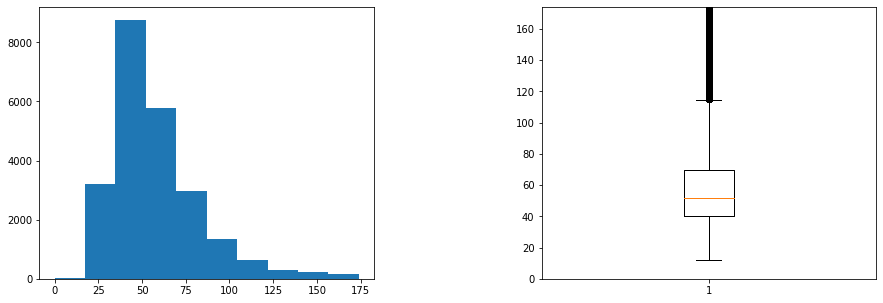

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

last_price
15300000.0


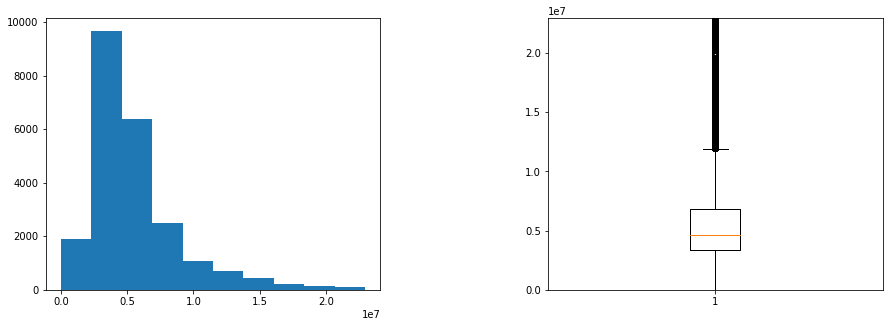

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

rooms
4.0


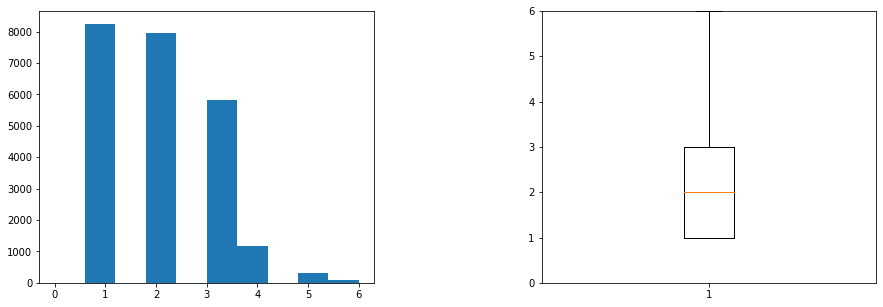

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

ceiling_height
3.11


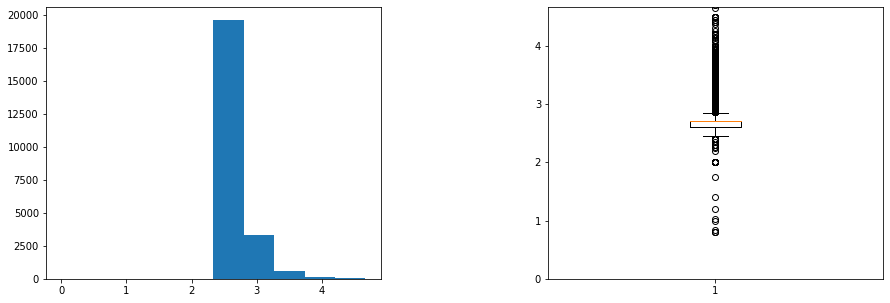

count    23699.000000
mean         2.700873
std          0.229660
min          0.800000
25%          2.600000
50%          2.700000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

In [17]:
# Напишем функцию для постороения гистограмм и диаграммы размаха
def analyze(column_name):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
    fig.subplots_adjust(wspace=0.5, hspace = 0.5)
    print(column_name)
    percentile_95 = np.percentile(data[column_name], 95)
    print(percentile_95)
    ax[0].hist(data[column_name],range = (0, percentile_95*1.5))
    plt.ylim(0, percentile_95*1.5)
    ax[1].boxplot(data[column_name])
    plt.show()
    display(data[column_name].describe())
    
# Вызываем функцию для построения гистограмм и диаграмм.    
analyze('total_area')
analyze('last_price')
analyze('rooms')
analyze('ceiling_height')


          

Имеются выбросы, с которыми чуть дальше мы разберемся. 


count    23699.000000
mean       169.804717
std        206.760398
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Перцентиль 95: 604.0


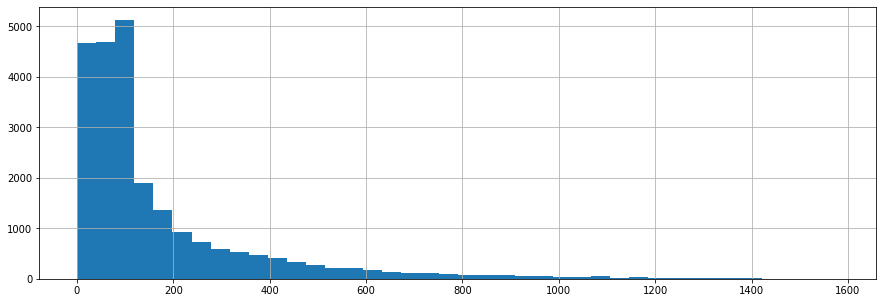

In [18]:
# Изучим время продажи квартиры
data['days_exposition'].hist(bins=40,figsize=(15,5))
display(data['days_exposition'].describe())
print('Перцентиль 95:', np.percentile(data['days_exposition'], 95))

# Значение медианы - 95 дней, Среднее значение  - 170 дней, Стандартное отклонение - 206
# Из гистограммы видно, что в большинств случае квартира продается в течение полугода
# Можем предполодить, что если при опубликовании объявления о продажи продавец получает много звонков, то
# он снимает объявление и повышает цену. Либо же маленькое значение срока публикации свидетельствует о допущенных 
# ошибках в объявлении, по причине которых объявление снимается с сайта(либо меняется на новое)


In [19]:
# Выше был найден перцентиль, от которого мы откинем остальные значения
days_exposition_percentile = np.percentile(data['days_exposition'],95)
rooms_percentile = np.percentile(data['rooms'],99)
total_area_percentile = np.percentile(data['total_area'],99)
last_price_percentile = np.percentile(data['last_price'],95)
ceiling_height_percentile = np.percentile(data['ceiling_height'],99)
data = data.query(
    '(5 < days_exposition < @days_exposition_percentile) & (rooms < @rooms_percentile) & (last_price < @last_price_percentile) & (total_area < @total_area_percentile) & ( 2 < ceiling_height < @ceiling_height_percentile)'
)
display(data.info())
# Уберали редкие и выбивающиеся значения. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20594 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20594 non-null  int64         
 1   last_price            20594 non-null  float64       
 2   total_area            20594 non-null  float64       
 3   first_day_exposition  20594 non-null  datetime64[ns]
 4   rooms                 20594 non-null  int64         
 5   ceiling_height        20594 non-null  float64       
 6   floors_total          20594 non-null  int64         
 7   living_area           20594 non-null  float64       
 8   floor                 20594 non-null  int64         
 9   is_apartment          20594 non-null  bool          
 10  studio                20594 non-null  bool          
 11  open_plan             20594 non-null  bool          
 12  kitchen_area          20594 non-null  float64       
 13  balcony         

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month,year,area_living_total,area_kitchen_total
count,20594.000000,2.059400e+04,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,16068.000000,16068.000000,20594.000000,6499.000000,20594.000000,7475.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000
mean,9.800136,5.061889e+06,54.065447,1.945033,2.673506,10.843838,30.853838,5.951976,9.735457,0.601583,29764.568584,15144.763692,0.421385,490.433913,0.537632,532.922007,134.413616,93538.499483,2.567787,6.397106,2017.464553,0.564075,0.192291
std,5.568176,2.617418e+06,19.846967,0.872924,0.162776,6.654095,13.578501,4.937946,3.955625,0.955982,13385.613431,8404.409941,0.704931,331.680004,0.836086,276.355970,127.441373,31012.447324,1.791598,3.488843,0.950037,0.108480,0.073718
min,0.000000,1.219000e+04,12.000000,1.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,287.000000,0.000000,1.000000,0.000000,13.000000,6.000000,111.830000,0.000000,1.000000,2014.000000,0.040000,0.040000
25%,6.000000,3.350000e+06,39.000000,1.000000,2.600000,5.000000,18.000000,2.000000,7.100000,0.000000,18450.750000,10718.000000,0.000000,292.000000,0.000000,317.000000,45.000000,75409.840000,1.000000,3.000000,2017.000000,0.490000,0.140000
50%,9.000000,4.490000e+06,50.000000,2.000000,2.650000,9.000000,29.900000,4.000000,9.000000,0.000000,27880.000000,13777.000000,0.000000,457.000000,0.000000,522.000000,95.000000,93545.720000,3.000000,6.000000,2018.000000,0.570000,0.180000
75%,14.000000,6.200000e+06,64.800000,3.000000,2.700000,16.000000,40.000000,8.000000,11.000000,1.000000,39393.000000,17073.000000,1.000000,614.000000,1.000000,745.000000,173.000000,110968.977500,4.000000,10.000000,2018.000000,0.640000,0.240000
max,39.000000,1.527600e+07,190.000000,4.000000,3.560000,60.000000,128.000000,33.000000,64.000000,5.000000,83758.000000,64857.000000,3.000000,3190.000000,3.000000,1344.000000,603.000000,387096.770000,6.000000,12.000000,2019.000000,1.510000,0.790000


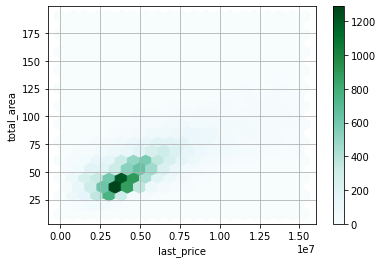

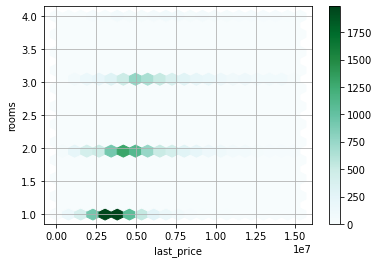

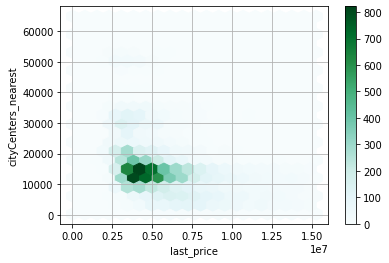

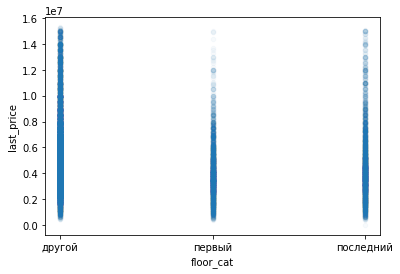

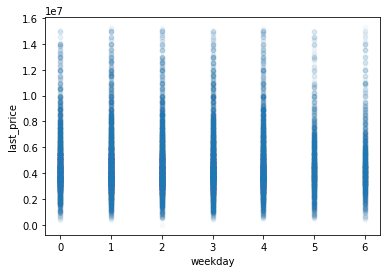

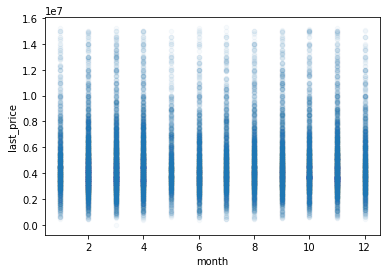

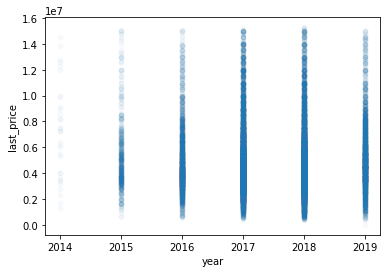

In [20]:
def price_dep(df, dep):
    df.plot(x='last_price', y = dep, kind='hexbin', gridsize=20, sharex=False, grid=True)
def price_scat(df, dep):
    df.plot(x= dep, y = 'last_price', kind = 'scatter', alpha=0.03)
price_dep(data,'total_area')
price_dep(data,'rooms')
price_dep(data,'cityCenters_nearest')
price_scat(data,'floor_cat')
price_scat(data,'weekday')
price_scat(data,'month')
price_scat(data,'year')
display(data.describe())



#### Вывод
Из диаграмм видно, что цены на квартиры на первом и последнем этаже часто ниже, чем на других. Также можно увидеть, что квартиры и хорошей ценой раскупались в 2017 и 2018 г, а в 2014 году Россия переживала кризис. Чем больше комнат (соответвенно и полощадь), тем выше цена. 

In [21]:
# Выберем 10 населенных пунтктов с наибольшим числом объявлений 
data_city = data.pivot_table(index= 'locality_name', values='price_per_m', aggfunc=['count','mean'])
data_city.columns=['count','mean_price_per_m']
data_city_top_10 = data_city.sort_values(by='count').tail(10)
display(data_city_top_10)
print('Наименьшее количество в топ 10 ', data_city_top_10['count'].min())
print('Наибольшее количество в топ 10 ', data_city_top_10['count'].max())
# Вывели на экран топ 10 населенных пунктов по количеству объявлений и среднюю цену за м2

,count,mean_price_per_m
locality_name,,
выборг,213,58084.374178
деревня кудрово,270,92565.956556
гатчина,280,69054.073429
поселок парголово,309,90122.578091
колпино,316,75276.305886
пушкин,319,100558.546928
всеволожск,367,67254.124578
поселок шушары,416,78737.112019
поселок мурино,519,85842.206628


Наименьшее количество в топ 10  213
Наибольшее количество в топ 10  13220


/Users/vladimrogulo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vladimrogulo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


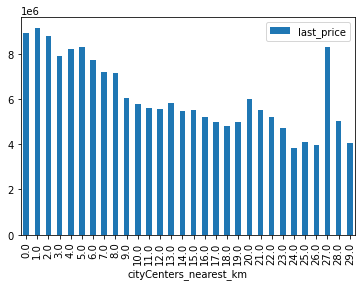

In [22]:
# Рассмотрим теперь Санкт-Петербург
data_spb = data.loc[data['locality_name'] == 'санкт-петербург']
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest'] / 1000
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest_km'].round(0)
data_spb_mean_km = data_spb.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price')
data_spb_mean_km.plot(kind='bar')
# Цена на квартиры падает на 9 км, скорее всего тут и кончается центр. 
# Имеется скачок цены на 27 км: будем считать, что это аналог Рублевки)) 


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month,year,area_living_total,area_kitchen_total,cityCenters_nearest_km
count,2674.000000,2.674000e+03,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,1682.000000,2674.000000,1893.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000,2674.000000
mean,9.741212,7.899209e+06,67.096530,2.304039,2.855568,7.684368,38.866010,4.339566,11.343399,0.321616,25082.799177,5265.357143,0.907255,475.165279,1.231862,487.224511,148.930067,121486.354428,2.550112,6.490651,2017.363500,0.573298,0.181597,5.213538
std,5.680050,2.866629e+06,24.012932,0.921907,0.249591,4.461063,16.871886,3.180660,5.062468,0.735353,5655.996662,1974.410169,0.869098,313.817465,1.057679,264.736376,135.806314,32213.771624,1.734078,3.421520,0.984101,0.115315,0.082142,1.956415
min,0.000000,1.686000e+06,12.000000,1.000000,2.400000,2.000000,2.000000,1.000000,2.000000,0.000000,11247.000000,287.000000,0.000000,9.000000,0.000000,22.000000,6.000000,15861.570000,0.000000,1.000000,2014.000000,0.040000,0.060000,0.000000
25%,6.000000,5.779250e+06,47.725000,2.000000,2.700000,5.000000,27.000000,2.000000,8.200000,0.000000,21293.000000,3962.750000,0.000000,288.250000,0.000000,265.000000,60.000000,98403.550000,1.000000,3.000000,2017.000000,0.510000,0.130000,4.000000
50%,9.000000,7.500000e+06,65.000000,2.000000,2.700000,6.000000,36.150000,4.000000,10.000000,0.000000,24370.500000,5165.500000,1.000000,441.000000,1.000000,471.000000,95.000000,116682.980000,3.000000,6.000000,2017.000000,0.590000,0.160000,5.000000
75%,14.000000,9.649750e+06,83.000000,3.000000,3.000000,9.000000,49.800000,5.000000,13.000000,0.000000,29034.000000,6839.000000,1.000000,595.000000,2.000000,688.000000,201.000000,139537.302500,4.000000,10.000000,2018.000000,0.650000,0.210000,7.000000
max,32.000000,1.520000e+07,190.000000,4.000000,3.560000,28.000000,108.000000,24.000000,50.200000,5.000000,44775.000000,8499.000000,3.000000,2295.000000,3.000000,1251.000000,603.000000,387096.770000,6.000000,12.000000,2019.000000,1.350000,0.750000,8.000000


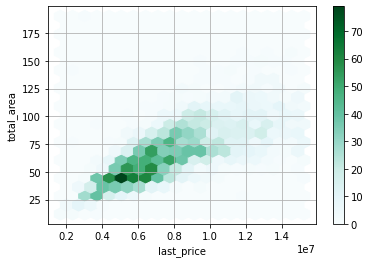

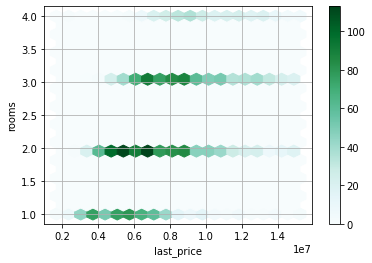

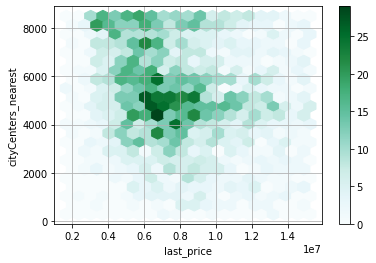

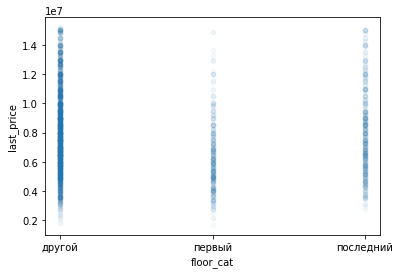

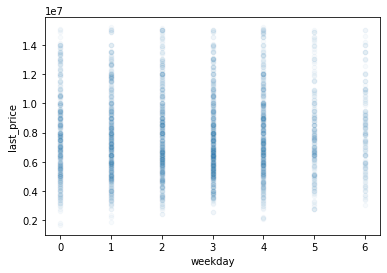

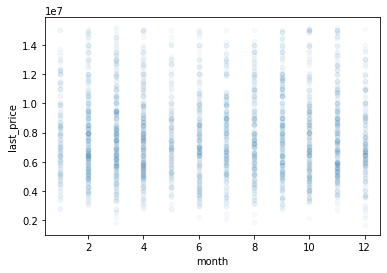

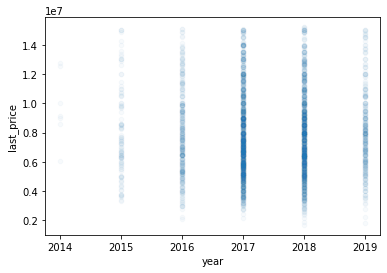

In [23]:
# Выделим наш центр
data_spb_centr = data_spb.query(
'cityCenters_nearest_km < 9'
)
display(data_spb_centr.describe())
price_dep(data_spb_centr,'total_area')
price_dep(data_spb_centr,'rooms')
price_dep(data_spb_centr,'cityCenters_nearest')
price_scat(data_spb_centr,'floor_cat')
price_scat(data_spb_centr,'weekday')
price_scat(data_spb_centr,'month')
price_scat(data_spb_centr,'year')

#### Вывод

Видим, что среднее  и медиана выровнялись и в некоторых столбцах значения практически совпадают, что говорит нам о нормальном распределении. 2017 и 2018 года для центра Санкт-Петербурга также были богаты на дорогие предложения. Средняя цена квартиры в Санкт-Петербурге составляет - 7 899 209р.
Количество комнат и площадь в области и Санкт-Петербурге также влияют на стоимоть квартиры. 



### Шаг 5. Общий вывод

"Когда мне тяжело, я всегда напоминаю себе о том, что если я сдамся – лучше не станет."

Это был большой и не легкий проект. Поработав с данными, мы устранили пропуски, и заменили/убрали аномальные значения. Средняя цена в центре Санкт-Петербурга составляет - 7 899 209р.

Мы увидели, что раньше было лучше, а именно в 2017 и 2018 г. были оптимальные цены для продажи квартиры(спрос рождает предложения).

Цены на 1 и последнем этаже ниже чем на других.

Для того, чтобы получить нормальное распределение, требуется разбить территорию на определенные локации, что мы и делали. 

И теперь, у нас появился топ-10 по популярности населенных пунктов. Не просто топ-10, а еще и со средней ценой за м2



### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод